In [73]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.datasets import make_blobs, make_moons
from sklearn.metrics import silhouette_samples


import pandas as pd
import numpy as np

from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

plt.style.use('ggplot')

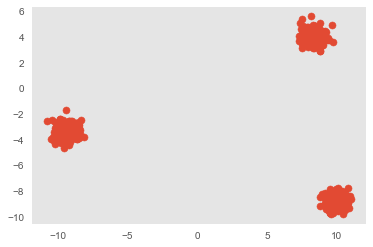

In [68]:
X, y = make_blobs(n_samples=500,
                 n_features=2,
                 centers=3,
                 cluster_std=0.5,
                 shuffle=True)

plt.scatter(X[:,0], X[:,1], s=50)
plt.grid()
plt.show()

# kmeans

In [30]:
km = KMeans(n_clusters=3,
           init='random',
           n_init=10,
           max_iter=300,
           tol=1e-04)
y_km = km.fit_predict(X)
y_km

array([2, 2, 2, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 1,
       1, 1, 2, 1, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2, 1,
       0, 0, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 0, 1, 2, 2, 0, 2,
       2, 2, 1, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 0, 1, 2, 1, 0, 1, 0, 2, 1, 1, 1,
       1, 0, 1, 2, 2, 0, 0, 2, 0, 2, 2, 1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 1,
       2, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0,
       2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 0,
       0, 1, 0, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 0, 2, 1, 2, 2, 1, 0, 0, 1,
       0, 1, 0, 2, 2, 2, 1, 2, 0, 2, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 2, 2,
       1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 1, 0, 0, 0, 1,
       1, 1, 2, 0, 2, 1, 1, 0, 2, 0, 0, 2, 1, 1, 0, 2, 0, 1, 2, 2, 2, 1,
       0, 1, 1, 0, 0, 0, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 1,
       0, 2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0,

### kmeans++ initialization

In [32]:
km = KMeans(n_clusters=3,
           init='k-means++', # << only needed change (also sklearn default)
           n_init=10,
           max_iter=300,
           tol=1e-04)
y_km = km.fit_predict(X)
y_km

array([1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 0,
       0, 0, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 1, 0,
       2, 2, 0, 2, 1, 0, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 1,
       1, 1, 0, 0, 2, 2, 0, 1, 2, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0,
       0, 2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0,
       1, 0, 2, 2, 0, 1, 0, 2, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2,
       1, 0, 1, 0, 2, 2, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2,
       2, 0, 2, 1, 1, 2, 0, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 1, 0, 2, 2, 0,
       2, 0, 2, 1, 1, 1, 0, 1, 2, 1, 0, 2, 1, 0, 0, 0, 2, 2, 2, 2, 1, 1,
       0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2, 0,
       0, 0, 1, 2, 1, 0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 1, 2, 0, 1, 1, 1, 0,
       2, 0, 0, 2, 2, 2, 0, 1, 0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 2, 1, 0, 0,
       2, 1, 1, 2, 1, 1, 1, 0, 2, 2, 1, 0, 1, 1, 2,

 ### elbow method

In [34]:
# within cluster SSE (distortion)
km.inertia_

252.57399761768724

In [47]:
distortions = []
silhouettes = []

for i in range(2, 11):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300)
    y_km = km.fit_predict(X)
    distortions.append(km.inertia_)
    sil = np.mean(silhouette_samples(X, y_km, metric='euclidean'))
    silhouettes.append(sil)
    
distortions

[4482.014378710057,
 252.57399761768724,
 219.07135179065523,
 189.05875782898613,
 163.7887857303491,
 144.25053582056609,
 127.63793753469444,
 112.16862194957963,
 103.51436137831372]

In [48]:
silhouettes

[0.7110131686625688,
 0.8803169499787376,
 0.7001113633346481,
 0.5150964816048138,
 0.3261359695728209,
 0.3472475228888858,
 0.3432309310825797,
 0.3434494106970808,
 0.3400380153334539]

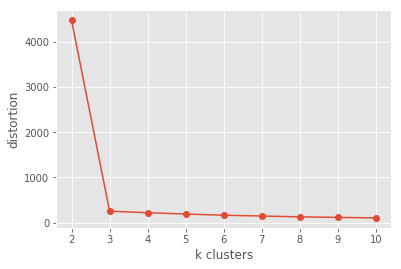

In [45]:
plt.plot(range(2, 11), distortions, marker='o')
plt.xlabel('k clusters')
plt.ylabel('distortion')
plt.show()

note elbow at k=3

### silhouette plot

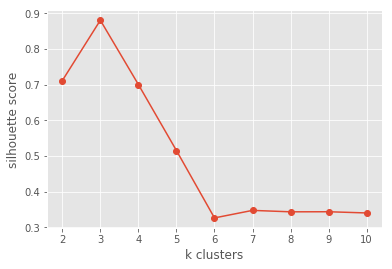

In [51]:
plt.plot(range(2, 11), silhouettes, marker='o')
plt.xlabel('k clusters')
plt.ylabel('silhouette score')
plt.show()

k=3 also maxes silhoutte score

In [52]:
km = KMeans(n_clusters=3,
               init='k-means++',
               n_init=10,
               max_iter=300)
y_km = km.fit_predict(X)

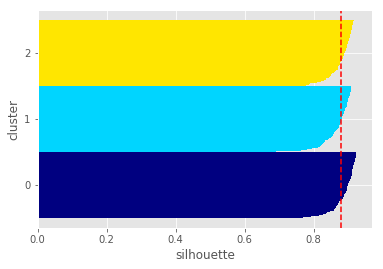

In [57]:
cluster_labels = np.unique(y_km)
sil = silhouette_samples(X, y_km, metric='euclidean')

y_lower, y_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_sil = sil[y_km==c]
    c_sil.sort()
    y_upper += len(c_sil)
    color = cm.jet(i / len(np.unique(y_km)))
    plt.barh(range(y_lower, y_upper),
            c_sil,
            height=1.0, edgecolor='none', color=color)
    yticks.append((y_lower + y_upper)/2)
    y_lower += len(c_sil)
    
sil_score = np.mean(sil)
plt.axvline(sil_score, color='red', linestyle='--')

plt.yticks(yticks, cluster_labels)
plt.ylabel('cluster')
plt.xlabel('silhouette')
plt.show()

# hierarchical clustering

### hierarchical agglomerative clustering via complete linkage

In [61]:
vars_ = ['x','y','z']
labs_ = ['id_{}'.format(i) for i in range(5)]

X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns=vars_, index=labs_)
df

,x,y,z
id_0,6.931691,6.457910,0.200742
id_1,5.884695,9.615313,0.390008
id_2,9.389369,7.567639,8.961786
id_3,7.753434,5.682064,1.338860
id_4,8.614032,5.064897,1.360965


In [62]:
dist_df = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                      columns=labs_,
                      index=labs_)
dist_df

,id_0,id_1,id_2,id_3,id_4
id_0,0.000000,3.331848,9.166656,1.603906,2.473232
id_1,3.331848,0.000000,9.484255,4.456787,5.394286
id_2,9.166656,9.484255,0.000000,8.021264,8.039736
id_3,1.603906,4.456787,8.021264,0.000000,1.059251
id_4,2.473232,5.394286,8.039736,1.059251,0.000000


In [63]:
clusters = linkage(df.values, method='complete', metric='euclidean')
clusters

array([[3.        , 4.        , 1.05925087, 2.        ],
       [0.        , 5.        , 2.47323219, 3.        ],
       [1.        , 6.        , 5.39428632, 4.        ],
       [2.        , 7.        , 9.48425521, 5.        ]])

In [66]:
pd.DataFrame(clusters, columns=['row index 1', 'row index 2', 'dist', 'n in cluster'])

,row index 1,row index 2,dist,n in cluster
0,3.0,4.0,1.059251,2.0
1,0.0,5.0,2.473232,3.0
2,1.0,6.0,5.394286,4.0
3,2.0,7.0,9.484255,5.0


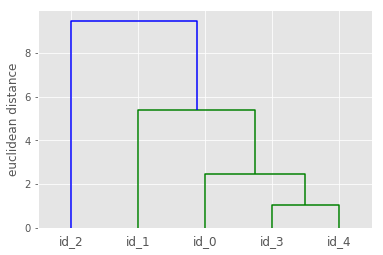

In [65]:
dendrogram(clusters, labels=labs_)
plt.ylabel('euclidean distance')
plt.show()

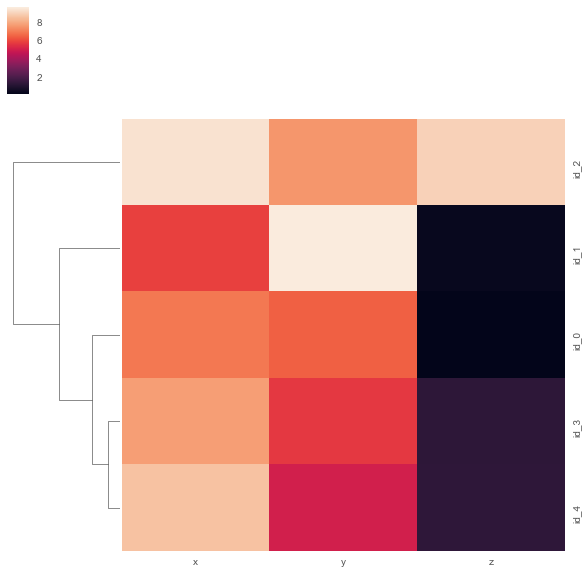

In [70]:
sns.clustermap(df, col_cluster=False, row_linkage=clusters)

### from sklearn

In [72]:
ac = AgglomerativeClustering(n_clusters=2,
                            affinity='euclidean',
                            linkage='complete')
labels = ac.fit_predict(df.values)
labels

array([0, 0, 1, 0, 0])

# density based clustering

### DBSCAN

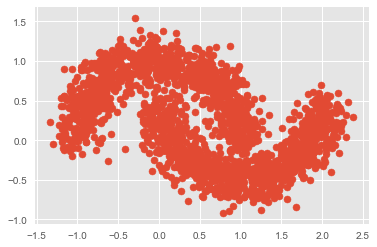

In [86]:
X, y = make_moons(n_samples=2000,
                 noise=0.15)
plt.scatter(X[:,0], X[:,1])

In [87]:
db = DBSCAN(eps=0.2,
           min_samples=50,
           metric='euclidean')

y_db = db.fit_predict(X)
y_db

array([ 0,  0,  0, ...,  0,  1, -1])

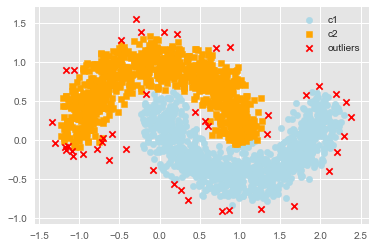

In [89]:
plt.scatter(X[y_db==0,0],
           X[y_db==0,1],
           c='lightblue',
           marker='o',
           s=40,
           label='c1')
plt.scatter(X[y_db==1,0],
           X[y_db==1,1],
           c='orange',
           marker='s',
           s=40,
           label='c2')
plt.scatter(X[y_db==-1,0],
           X[y_db==-1,1],
           c='red',
           marker='x',
           s=40,
           label='outliers')
plt.legend()
plt.show()